In [1]:
import time
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Reshape, Conv1D, Subtract, Activation, Flatten, Lambda, Add, Multiply, Bidirectional, Dense, BatchNormalization, SpatialDropout1D, LSTM
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model

from IPython.display import Image
from IPython.core.display import HTML 

import sys
sys.path.append("../")
from config import APP_CONFIG, JACK_KELLY_INPUT_CONFIG, DEFAULT_STEP_SIZE, FORWARD_FILLING_WINDOW

from __models__ import *
from util import *

# 1.	Proposed Methods
## 1.1.	Models with STD Branch
Add a STD branch in order to smooth out the output sequence

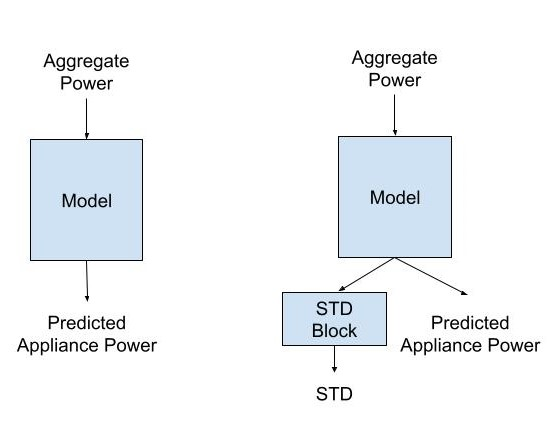

In [2]:
Image(filename = "./docs/std_arc.jpg")

## 1.2. Training with Smooth loss function
Customize loss function by add a smooth term

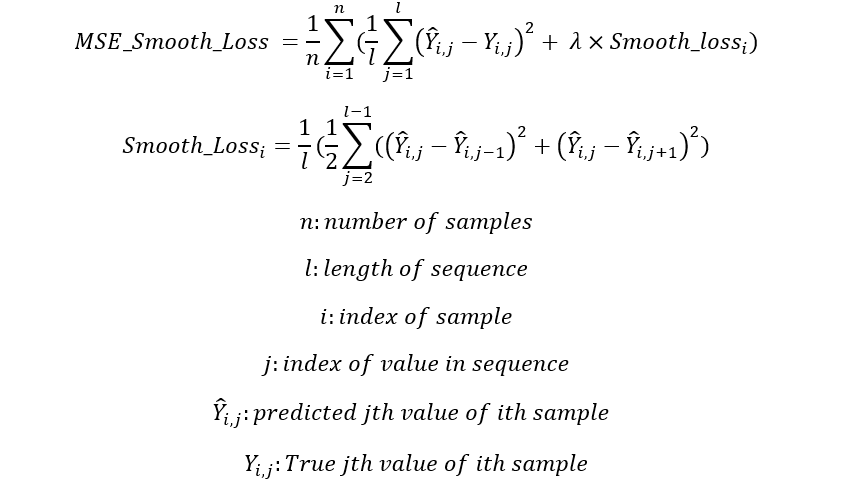

In [3]:
Image(filename = "./docs/equation.png")

# 1.3 Clip Prediction
Based on the predicted status of appliance, clip the aggregate power to get appliance power

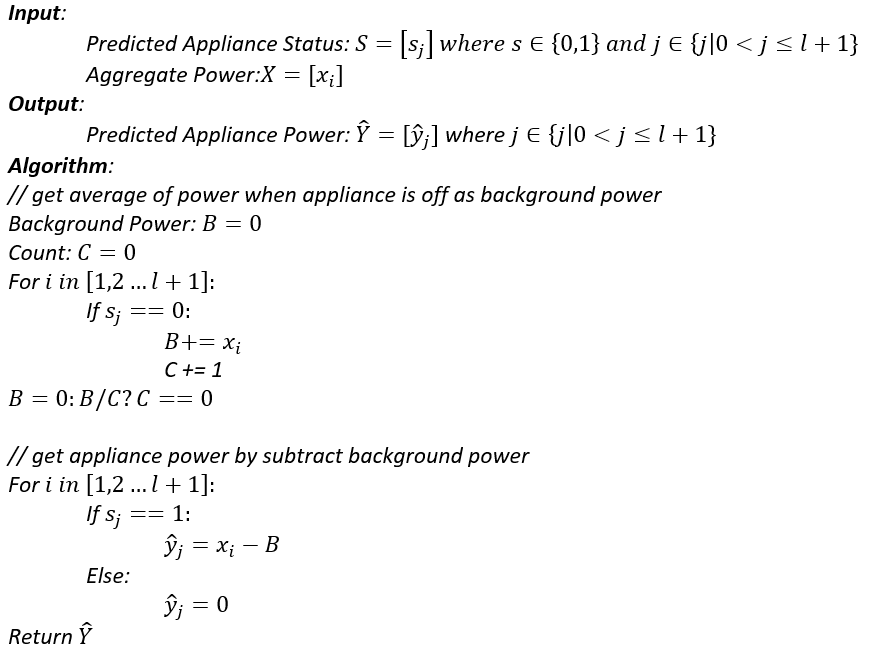

In [4]:
Image(filename = "./docs/pseudo.png")

# 2. Experiment Result

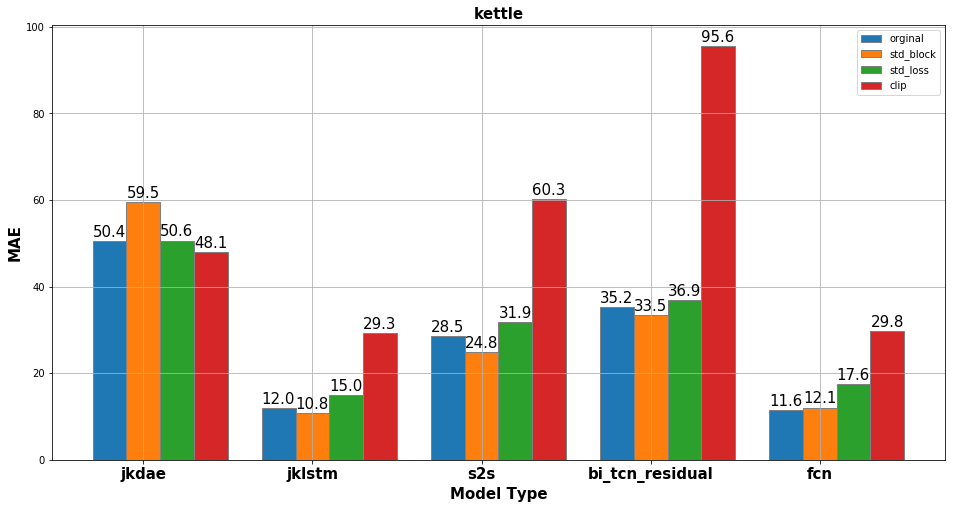

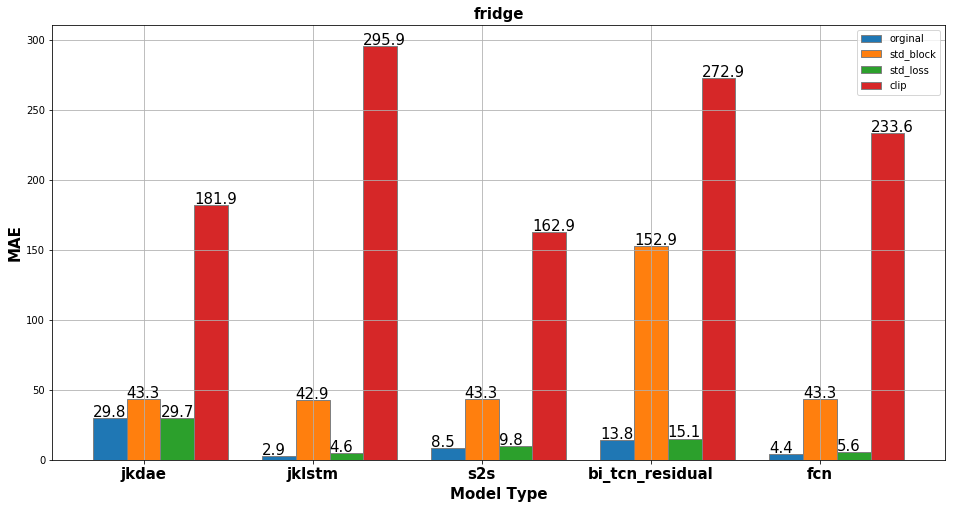

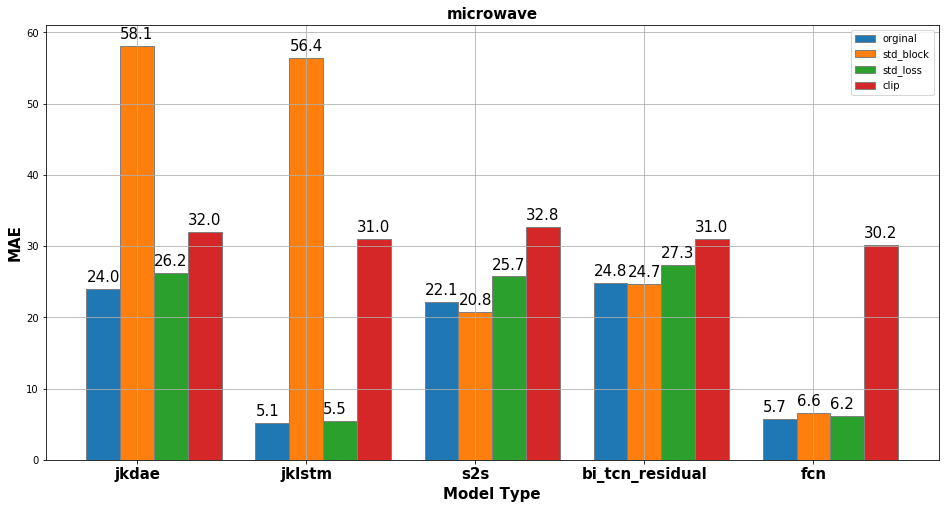

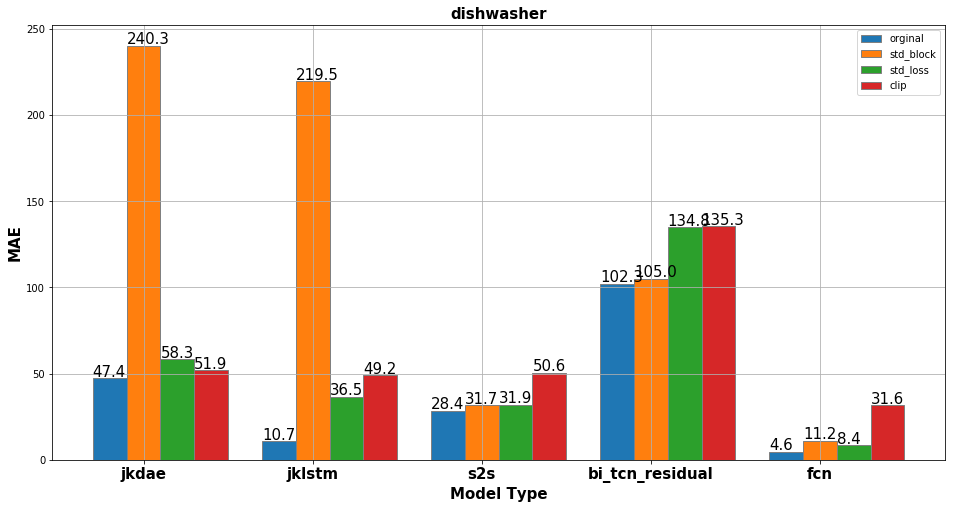

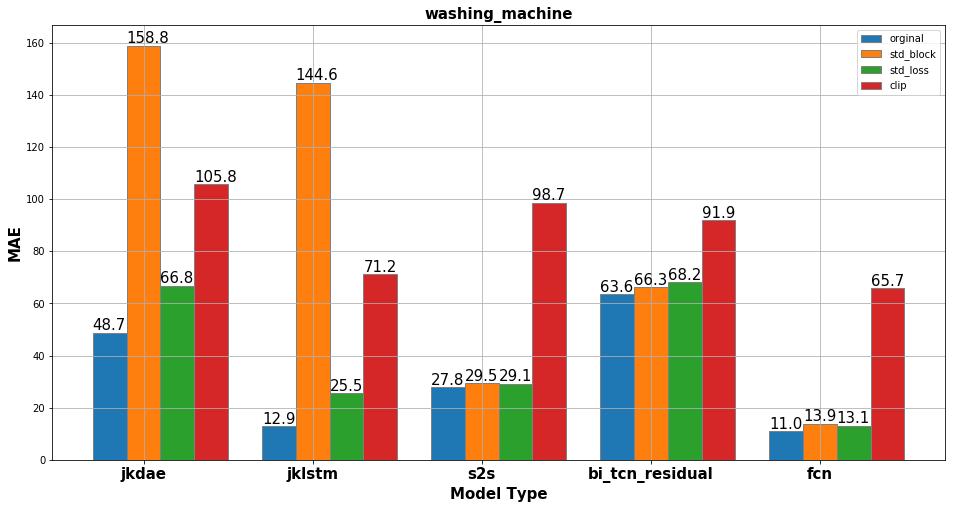

In [5]:
model_names = ['jkdae', 'jklstm', 's2s', 'bi_tcn_residual', 'fcn']
sub_model_type = ['orginal', 'std_block', 'std_loss', 'clip']
metric = 'mae'

# read file
df = pd.read_csv('./docs/evluation_result.csv')
df['model'] = df['model'].apply(lambda x: x[8:] if x[:8] == 'machine_' else x)

for appliance in df['appliance'].unique():
    ##### a) data extraction
    result = []
    for sub_t in sub_model_type:
        sub_result = []
        if sub_t == 'orginal':
            sub_t = ''
        else:
            sub_t = '_' + sub_t
        for m in model_names:
            r = df[(df['appliance'] == appliance) & (df['model'] == m+sub_t) & (df['metric'] == metric)]['evaluation'].tolist()[0]
            sub_result.append(r)
        result.append(sub_result)

    ##### b) plot
    # set width of bar
    barWidth = 1 / (len(result) + 1)
    fig = plt.subplots(figsize =(16, 8))

    bar_Xs = [ [ x + i*barWidth for x in range(len(result[0])) ] for i in range(len(result))]

    # Make the plot
    for i in range(len(result)):
        plt.bar(bar_Xs[i], result[i], width = barWidth, edgecolor ='grey', label =sub_model_type[i])
        for j, v in enumerate(result[i]):
            plt.text(bar_Xs[i][j]-0.1 , v + 1, '{:.1f}'.format(v), color = 'black', fontsize = 15)
        
        
    # Adding Xticks
    plt.title(appliance, fontweight ='bold', fontsize = 15)
    plt.xlabel('Model Type', fontweight ='bold', fontsize = 15)
    plt.ylabel('MAE', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(result[0]))],model_names, fontweight ='bold', fontsize = 15)
    plt.grid()
    plt.legend()
    plt.show()